**To Do List**
- Read up on normalizing - tabs already found

**Dictionary and Definitions**
- Fans is a user attribute not a video attribute. It is the value as of the date of data pull, not of the video being posted.
    - Pulling old videos may cause disconnect between user base when video was posted and now

In [1]:
import datetime as dt
import pickle
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [78]:
#Read in data
pkl_file = open('tiktoklist1.pickle', 'rb')
tiktok_pkl = pickle.load(pkl_file)

In [79]:
#Create Dataframe
tiktoks = pd.DataFrame.from_dict(tiktok_pkl,orient='index')
tiktoks.index.name = 'video_id'

In [80]:
##Prints Duplicates if any and then drops them
tiktoks.loc[tiktoks.duplicated()]

,user,fans,views,posttime
video_id,,,,


In [65]:
##Drop Duplicates
tiktoks = tiktoks.drop_duplicates()

In [91]:
## Drop anyone with < 5 videos, not enough sample size for normalization
tikgroup = tiktoks.groupby(by='user').count().sort_values(by='posttime')
tikgroup = tikgroup.loc[tikgroup['posttime'] < 5]
ul = tikgroup.index

for user in ul:
    to_drop = tiktoks.loc[tiktoks['user'] == user].index
    tiktoks.drop(to_drop,inplace=True)
    

In [92]:
##Add a few variables
tiktoks['posttime'] = pd.to_datetime(tiktoks['posttime'],unit='s')
tiktoks['date'] = tiktoks['posttime'].dt.date
tiktoks['hour'] = tiktoks['posttime'].dt.hour
tiktoks['day'] = tiktoks['posttime'].dt.weekday

In [93]:
##Let's also split users up by their fan count

user_df = tiktoks.drop_duplicates(subset=['user']).loc[:,['user','fans']].reset_index(drop=True)

user_df.sort_values(by=['fans'])
##plt.hist(tiktoks['fans'])                

,user,fans
62,6808197838368850950,9827
22,6709481797258511366,13400
63,6670840091827273734,16300
27,6694302904487379974,19700
73,6787490807429825541,20000
...,...,...
46,6748929703376536581,7000000
52,228700074422296576,8800000
39,153416220371775488,9400000
51,132667022575992832,12900000


In [8]:
##Join back to the original - only if you want account sizes
##tiktoks = tiktoks.merge(user_df.loc[:,['user','fans']],right_on = ['user'], left_on=['user'])

In [85]:
##Alter a few datatypes for series - necessary for scikitlearn method
tiktoks['user'] = tiktoks['user'].astype('int64')
tiktoks['views'] = tiktoks['views'].astype('float64')

In [86]:
## Here is what dataframe looks like
tiktoks.head()

,user,fans,views,posttime,date,hour,day
video_id,,,,,,,
6929135730618879237,6700343527676740613,5800000,2607.0,2021-02-14 15:05:44,2021-02-14,15,6
6928770891627121926,6700343527676740613,5800000,1500000.0,2021-02-13 15:29:58,2021-02-13,15,5
6928372946792664326,6700343527676740613,5800000,203100.0,2021-02-12 13:45:48,2021-02-12,13,4
6928012472490265861,6700343527676740613,5800000,133700.0,2021-02-11 14:26:59,2021-02-11,14,3
6927642059599908102,6700343527676740613,5800000,255100.0,2021-02-10 14:29:36,2021-02-10,14,2


In [94]:
##Create list of unique values to iterate through for normalization
user_list = user_df['user']
user_list

0     6700343527676740613
1     6866499035965654022
2     6805364861930783749
3     6648625797669535749
4     6793185122575107077
             ...         
78    6807116212674561029
79    6791739431273726981
80    6798181487554462725
81    6726230203645887494
82    6723287733420786694
Name: user, Length: 83, dtype: int64

In [95]:
##Scale views by tiktok author - this prevents big accounts from outweighing smaller creators
scaler = MinMaxScaler()

for user in user_list:
        norm_data = scaler.fit_transform(tiktoks.loc[tiktoks['user'] == user]['views'].values.reshape(-1, 1))
        tiktoks.loc[tiktoks['user'] == user,'norm_data'] = norm_data

In [96]:
scaler = MinMaxScaler()
norm_data = scaler.fit_transform(tiktoks.loc[tiktoks['user'] == 6805364861930783749]['views'].values.reshape(-1, 1))
norm_data

array([[0.05675621],
       [0.00294185],
       [0.0030136 ],
       [0.        ],
       [0.00955743],
       [0.04299409],
       [0.44033064],
       [0.5838356 ],
       [0.0172206 ],
       [0.01818208],
       [0.00793582],
       [0.01762241],
       [0.00938522],
       [0.00625682],
       [0.0101745 ],
       [0.04374031],
       [0.00987314],
       [0.00586935],
       [0.00566845],
       [0.0187561 ],
       [0.02650537],
       [0.04709833],
       [0.0215401 ],
       [0.01746455],
       [0.01861259],
       [0.02273119],
       [0.03632111],
       [0.04382642],
       [0.02433844],
       [0.66993858],
       [0.0534843 ],
       [0.49773262],
       [0.10671029],
       [0.41162964],
       [0.0391051 ],
       [0.04210436],
       [0.03772746],
       [0.04382642],
       [0.04926525],
       [0.03429769],
       [0.02946157],
       [0.02370702],
       [0.02382182],
       [0.0260318 ],
       [0.12517938],
       [0.02486941],
       [0.02772516],
       [0.031

In [97]:
##This is a demonstration of what numpy reshape does for the feature scaling. 
#The list needs to be a series of one value lists
tiktoks.loc[tiktoks['user'] == 6805364861930783749]['views'].values.reshape(-1, 1)

array([[ 427100.],
       [  52100.],
       [  52600.],
       [  31600.],
       [  98200.],
       [ 331200.],
       [3100000.],
       [4100000.],
       [ 151600.],
       [ 158300.],
       [  86900.],
       [ 154400.],
       [  97000.],
       [  75200.],
       [ 102500.],
       [ 336400.],
       [ 100400.],
       [  72500.],
       [  71100.],
       [ 162300.],
       [ 216300.],
       [ 359800.],
       [ 181700.],
       [ 153300.],
       [ 161300.],
       [ 190000.],
       [ 284700.],
       [ 337000.],
       [ 201200.],
       [4700000.],
       [ 404300.],
       [3500000.],
       [ 775200.],
       [2900000.],
       [ 304100.],
       [ 325000.],
       [ 294500.],
       [ 337000.],
       [ 374900.],
       [ 270600.],
       [ 236900.],
       [ 196800.],
       [ 197600.],
       [ 213000.],
       [ 903900.],
       [ 204900.],
       [ 224800.],
       [ 253600.],
       [ 318500.],
       [7000000.]])

**Data Exploration**

At this point we have all the data we need for some preliminary exploration. 


(array([2807.,  377.,  149.,   79.,   47.,   34.,   24.,   17.,   11.,
          96.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

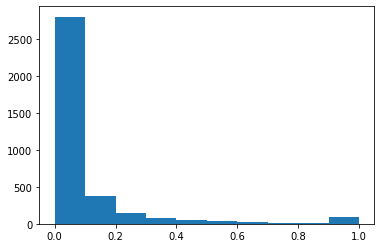

In [98]:
plt.hist(tiktoks['norm_data'])

In [40]:
binned = pd.cut(tiktoks['norm_data'], [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.01 ],include_lowest=True, right=True).value_counts()
tiktoks['bin'] = pd.cut(tiktoks['norm_data'], [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.01 ],include_lowest=True, right=True)

In [41]:
bincount = pd.pivot_table(tiktoks,index='bin',values='user',aggfunc='count')
bincount['perc']=bincount['user']/bincount['user'].sum()
bincount

,user,perc
bin,,
"(-0.001, 0.1]",1270,0.622244
"(0.1, 0.2]",293,0.143557
"(0.2, 0.3]",133,0.065164
"(0.3, 0.4]",87,0.042626
"(0.4, 0.5]",67,0.032827
"(0.5, 0.6]",29,0.014209
"(0.6, 0.7]",22,0.010779
"(0.7, 0.8]",20,0.009799
"(0.8, 0.9]",18,0.008819


In [42]:
bindf = pd.pivot_table(tiktoks,index='bin',values='views',aggfunc='sum')
bindf['perc'] = bindf['views']/bindf['views'].sum()
bindf

,views,perc
bin,,
"(-0.001, 0.1]",496630610.0,0.165221
"(0.1, 0.2]",441096423.0,0.146745
"(0.2, 0.3]",274229376.0,0.091231
"(0.3, 0.4]",248729748.0,0.082748
"(0.4, 0.5]",263736188.0,0.087741
"(0.5, 0.6]",83441746.0,0.027760
"(0.6, 0.7]",155617712.0,0.051771
"(0.7, 0.8]",173173684.0,0.057612
"(0.8, 0.9]",152506000.0,0.050736


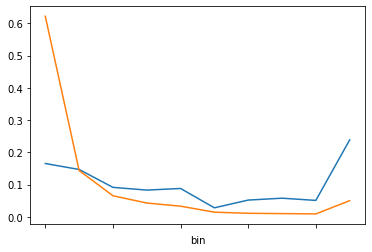

In [43]:
bindf['perc'].plot()
bincount['perc'].plot()

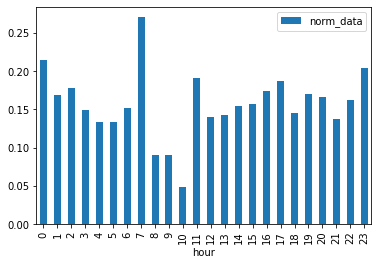

In [44]:
hourly_data = pd.pivot_table(tiktoks,index='hour',values='norm_data',aggfunc='mean')
hourly_data.plot(kind='bar')

In [45]:
pd.set_option('display.max_rows',30)

tiktoks['hour'].value_counts().sort_index()

0     112
1     117
2     117
3      83
4      62
5      48
6      25
7      17
8      18
9      29
10     15
11     30
12     33
13     50
14     85
15     87
16     97
17    137
18    132
19    153
20    142
21    131
22    150
23    171
Name: hour, dtype: int64

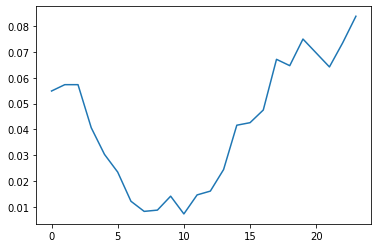

In [46]:
tiktoks['hour'].value_counts().sort_index()/tiktoks['hour'].value_counts().sum()
p1 = tiktoks['hour'].value_counts().sort_index()/tiktoks['hour'].value_counts().sum()
p1.plot()

In [47]:
tiktoks.loc[tiktoks['norm_data']>=.8]['hour'].value_counts().sort_index()

0     10
1      6
2      9
3      3
4      3
5      2
6      1
7      2
8      1
9      1
11     3
12     2
13     2
14     5
15     5
16     6
17    11
18     3
19    10
20     7
21     7
22     9
23    12
Name: hour, dtype: int64

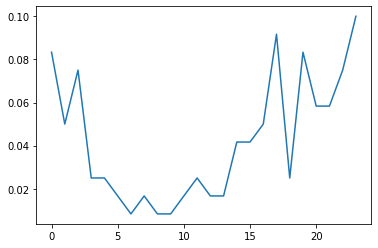

In [48]:
tiktoks.loc[tiktoks['norm_data']>=.8]['hour'].value_counts().sort_index()/tiktoks.loc[tiktoks['norm_data']>=.8]['hour'].value_counts().sum()
p2 = tiktoks.loc[tiktoks['norm_data']>=.8]['hour'].value_counts().sort_index()/tiktoks.loc[tiktoks['norm_data']>=.8]['hour'].value_counts().sum()
p2.plot()

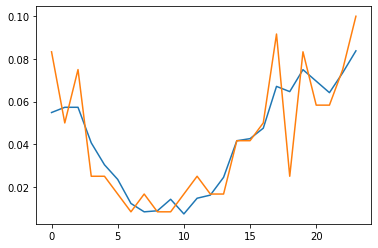

In [49]:
p1.plot()
p2.plot()

(0, 500000)

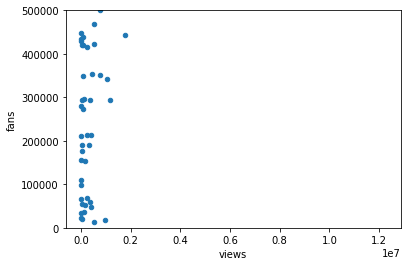

In [105]:
## Compare views received to # of fans. a
fanviewratio = pd.pivot_table(tiktoks, index = 'user', values =['views','fans'], aggfunc='mean')
fanviewratio.plot.scatter(x='views',y='fans')
plt.ylim(0,500000)

In [57]:
##Correlation
fanviewratio['views'].corr(fanviewratio['fans'],method='pearson')

0.6053760173938888

In [106]:
##Correlation for small fan base
smallfans = fanviewratio.loc[fanviewratio['fans']<=500000]
smallfans['views'].corr(smallfans['fans'],method='pearson')

0.23864744387276074

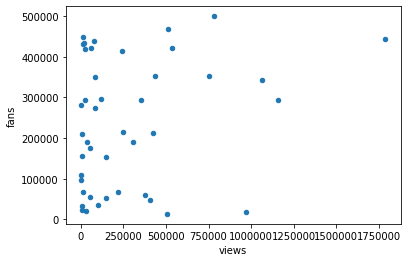

In [107]:
##Same data as above but different x scale. Great example that scale matters!!!
smallfans.plot.scatter(x='views',y='fans')

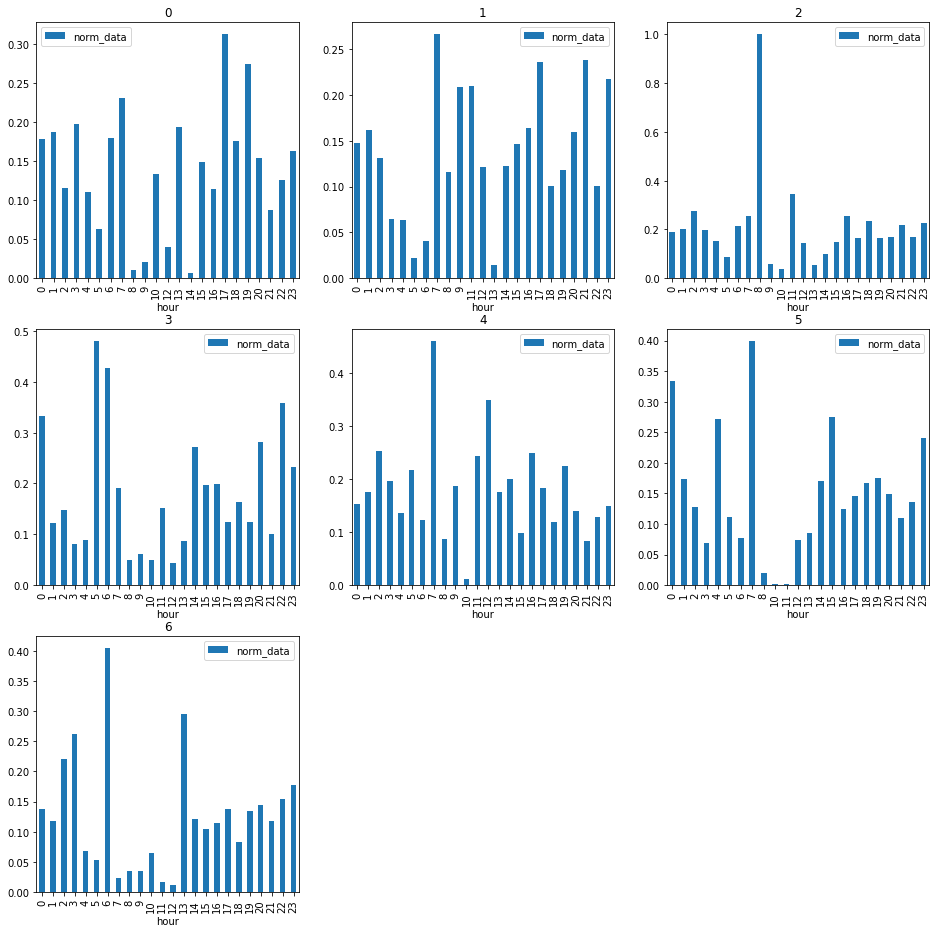

In [86]:
##Show best time of day to post by day

fig = plt.figure(figsize=(16,16))
for day in range(0,7):
    ax = fig.add_subplot(3,3,day+1)
    pd.pivot_table(tiktoks.loc[tiktoks['day'] == day],index='hour',values='norm_data',aggfunc='mean').plot(kind='bar', ax=ax)
    ax.set_title('{}'.format(day))
    
plt.show()

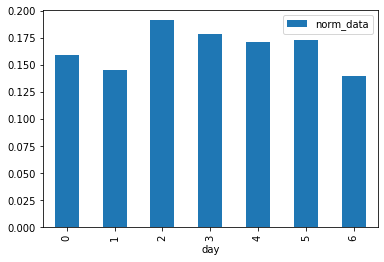

In [108]:
##Best day of the week to post
pd.pivot_table(tiktoks,index='day',values='norm_data',aggfunc='mean').plot(kind='bar')


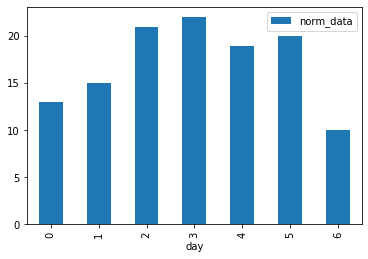

In [111]:
#day of week when viral videos are posted
pd.pivot_table(tiktoks.loc[tiktoks['norm_data']>=.8],index='day',values='norm_data',aggfunc='count').plot(kind='bar')


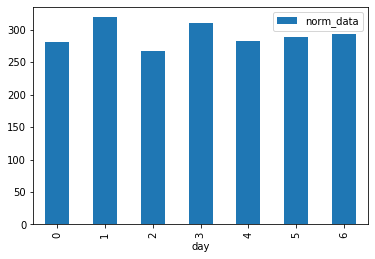

In [112]:
#
pd.pivot_table(tiktoks,index='day',values='norm_data',aggfunc='count').plot(kind='bar')


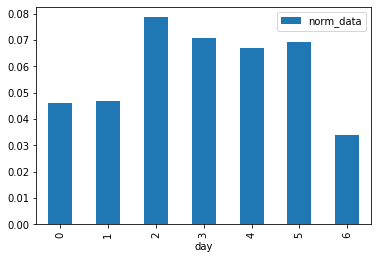

In [115]:
ratio = pd.pivot_table(tiktoks.loc[tiktoks['norm_data']>=.8],index='day',values='norm_data',aggfunc='count')/pd.pivot_table(tiktoks,index='day',values='norm_data',aggfunc='count')
ratio.plot(kind='bar')